# Evaluation

In [1]:
from collections import Counter
import json
import numpy as np
import pandas as pd

from utils import generate_wordcloud
from wordcloud import WordCloud

## clustering evaluation

In [180]:
DIR = "amann/"

RESULTS_PATH_KMEANS = f"../results/{DIR}kmeans_results_amann.json"
RESULTS_PATH_DBSCAN = f"../results/{DIR}dbscan_results_amann.json"
RESULTS_PATH_KMEDOIDS = f"../results/{DIR}kmedoids_results_amann.json"
RESULTS_PATH_KMEANS = f"../results/{DIR}kmeans_results_amann.json"
#RESULTS_PATH_KMEANS_NOISELESS = f"../results/{DIR}kmeans_results_amann_noiseless.json"
MAX_ARI = 0.5
MIN_ARI = -0.1

### standard

In [184]:
with open(RESULTS_PATH_KMEANS) as f:
    kmeans = json.load(f)

kmeans_scores = {}
kmeans_top_words = {}

for k,v in kmeans.items():
    kmeans_scores[k] = v["scores"]
    kmeans_top_words[k] = v["tw"]

In [185]:
with open(RESULTS_PATH_DBSCAN) as f:
    dbscan = json.load(f)
    
dbscan_scores = {}

for k,v in dbscan.items():
    dbscan_scores[k] = v["scores"]

In [186]:
with open(RESULTS_PATH_KMEDOIDS) as f:
    kmedoids = json.load(f)
    
kmedoids_scores = {}

for k,v in kmedoids.items():
    kmedoids_scores[k] = v["scores"]

### noiseless

In [10]:
with open(RESULTS_PATH_KMEANS_NOISELESS) as f:
    kmeans_noiseless = json.load(f)

kmeans_noiseless_scores = {}
kmeans_noiseless_top_words = {}

for k,v in kmeans_noiseless.items():
    kmeans_noiseless_scores[k] = v["scores"]
    kmeans_noiseless_top_words[k] = v["tw"]

### dfs

In [191]:
kmeans_score_df = pd.DataFrame.from_dict(kmeans_scores, 
                                         orient="index").sort_values("ari", ascending=False)

In [209]:
kmeans_score_df.head(5)

,ari,vm
Barock/Naturalismus,0.792453,0.735395
Aufklärung/Naturalismus,0.733032,0.666153
Barock/Realismus,0.639443,0.624254
Biedermeier/Expressionismus,0.550537,0.519971
Klassik/Expressionismus,0.550537,0.519971


In [195]:
dbscan_score_df = pd.DataFrame.from_dict(dbscan_scores, 
                                         orient="index").sort_values("ari", ascending=False)

In [202]:
dbscan_score_df.head(5)

,ari,vm
Barock/Romantik,0.516408,0.561182
Barock/Realismus,0.484925,0.499674
Barock/Biedermeier,0.458098,0.519726
Barock/Naturalismus,0.451175,0.481697
Barock/Klassik,0.442937,0.473814


In [198]:
kmedoids_score_df = pd.DataFrame.from_dict(kmedoids_scores, 
                                           orient="index").sort_values("ari", ascending=False)

In [206]:
kmedoids_score_df.head(8)

,ari,vm
Barock/Expressionismus,0.773694,0.708369
Barock/Romantik,0.715652,0.682237
Barock/Klassik,0.711598,0.678520
Barock/Biedermeier,0.711576,0.624808
Barock/Realismus,0.686076,0.587818
Klassik/Expressionismus,0.632019,0.586619
Barock/Naturalismus,0.609142,0.519008
Biedermeier/Expressionismus,0.559298,0.441904


## Best Epochs

In [14]:
best_epochs = {}
min_score = 0.7

In [15]:
kmeans_best = list(kmeans_score_df[kmeans_score_df.ari >= min_score].index)
best_epochs["kmeans"] = kmeans_best
kmeans_score_df.head(7)

,ari,vm
Barock/Naturalismus,0.805490,0.746453
Barock/Realismus,0.773402,0.729663
Aufklärung/Naturalismus,0.745326,0.621077
Barock/Klassik,0.688026,0.651029
Barock/Aufklärung,0.541105,0.530550
Barock/Biedermeier,0.335736,0.423804
Aufklärung/Realismus,0.293688,0.394675


In [17]:
kmedoids_best = list(kmedoids_score_df[kmedoids_score_df.ari >= min_score].index)
best_epochs["kmedoids"] = kmedoids_best
kmedoids_score_df#.head(7)

,ari,vm
Barock/Realismus,0.860581,0.811946
Barock/Klassik,0.836902,0.784668
Barock/Expressionismus,0.683957,0.610906
Barock/Naturalismus,0.632206,0.537986
Aufklärung/Realismus,0.550768,0.559927
Barock/Romantik,0.543027,0.498014
Barock/Aufklärung,0.430008,0.353975
Aufklärung/Biedermeier,0.225278,0.153966
Klassik/Expressionismus,0.130435,0.115554
Biedermeier/Expressionismus,0.089631,0.102830


In [129]:
dbscan_best = list(dbscan_score_df[dbscan_score_df.ari >= min_score].index)
best_epochs["dbscan"] = dbscan_best
dbscan_score_df.head(7)

,ari,vm
Barock/Realismus,0.515060,0.531504
Barock/Klassik,0.491301,0.499456
Barock/Biedermeier,0.452367,0.513535
Barock/Naturalismus,0.411893,0.444248
Barock/Aufklärung,0.374712,0.380885
Aufklärung/Romantik,0.313450,0.152963
Biedermeier/Expressionismus,0.289992,0.190054


In [132]:
best_epochs_list = []

for k, v in best_epochs.items():
    for pair in v:
        epochs = pair.split("/")
        for epoch in epochs:
            best_epochs_list.append(epoch)
best_epochs_counter = dict(Counter(best_epochs_list).most_common(8))

In [133]:
best_epochs_counter

{'Barock': 7,
 'Realismus': 4,
 'Naturalismus': 3,
 'Aufklärung': 3,
 'Klassik': 3,
 'Expressionismus': 1,
 'Biedermeier': 1}

In [135]:
sum_counts = sum(best_epochs_counter.values())
c = 0
for k, v in best_epochs_counter.items():
    print(f"{k}: {int(v/sum_counts * 100)}%")

Barock: 31%
Realismus: 18%
Naturalismus: 13%
Aufklärung: 13%
Klassik: 13%
Expressionismus: 4%
Biedermeier: 4%


## top words

In [210]:
tw = pd.DataFrame.from_dict(kmeans_top_words, orient="index")
tw.columns = ["cluster1", "cluster2"]

In [213]:
tw.head()

,cluster1,cluster2
Barock/Aufklärung,"[mädchen, dieß, jhr, hertz, jesus, amor, flur,...","[auff, vnd, wil, auß, diß, hertz, jhr, gantz, ..."
Barock/Klassik,"[auff, vnd, hertz, wil, diß, auß, jhr, gantz, ...","[mädchen, zwei, ew, ger, not, leise, tun, sehn..."
Barock/Romantik,"[mädchen, tränen, duft, rings, sehnsucht, dieß...","[auff, vnd, hertz, wil, diß, auß, jhr, gantz, ..."
Barock/Biedermeier,"[not, deutschen, dieß, tut, tränen, mädchen, e...","[auff, vnd, hertz, wil, diß, auß, jhr, gantz, ..."
Barock/Realismus,"[auff, vnd, diß, sey, wil, hertz, auß, jhr, of...","[leise, drei, mädchen, un, dunkel, de, duft, r..."


In [214]:
tw = tw.loc[["Barock/Aufklärung"]]

In [215]:
def strjoin(liste):
    return " ".join(liste)

In [216]:
tw["cluster1"] = tw.cluster1.apply(strjoin)
tw["cluster2"] = tw.cluster2.apply(strjoin)

In [218]:
for i in tw.cluster1.values:
    print(i)
    
for i in tw.cluster2.values:
    print(i)

mädchen dieß jhr hertz jesus amor flur diß hain wuth
auff vnd wil auß diß hertz jhr gantz hertze hertzen


## classification evaluation

In [1]:
import json
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import numpy as np
import pandas as pd
from stop_words import get_stop_words
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.svm import LinearSVC, SVC


from utils import add_epoch_division, linkage_matrix, merge_corpus_poets, plot_dendrogram, remove_noise_poet, text_cleaning

In [2]:
LOWERCASE = True
MAX_FEATURES = 10000
PATH = "../corpora/amann_poems.csv"
PRELOAD = True
DIM_RED = False
STOP_WORDS = get_stop_words("de")

In [3]:
corpus = pd.read_csv(PATH, index_col=0)

In [4]:
corpus.epoch.value_counts()

Aufklärung         59
Klassik            54
Realismus          43
Barock             41
Biedermeier        27
Naturalismus       19
Expressionismus    10
Romantik            9
Name: epoch, dtype: int64

In [5]:
unique_poets = list(np.unique(corpus.poet))

In [177]:
poets_epochs = {'Abschatz, Hans Aßmann von': "Barock",
                "Ahlefeld, Charlotte von": "Klassik",
               "Angelus Silesius": "Barock",
               "Arndt, Ernst Moritz": "Klassik",
               "Arnim, Ludwig Achim von": "Romantik",
               "Arnold, Gottfried": "Barock",
               "Aston, Louise": "Biedermeier",
               "Ball, Hugo": "Expressionismus",
               "Baudelaire, Charles": "Biedermeier",
               "Bechstein, Ludwig": "Romantik",
               "Bierbaum, Otto Julius": "Realismus",
               "Birken, Sigmund von": "Barock",
               "Blumauer, Aloys": "Aufklärung",
               "Bodenstedt, Friedrich von": "Realismus",
               "Bodmer, Johann Jacob": "Aufklärung",
               "Boie, Heinrich Christian": "Sturm_Drang",
               "Brinckman, John": "Realismus",
               "Busch, Wilhelm": "Biedermeier",
               "Candidus, Karl": "Realismus",
               "Canitz, Friedrich Rudolph Ludwig von": "Barock",
               "Celander (auch Johann Georg Gressel)": "Barock",
               "Christen, Ada": "Realismus",
               "Conradi, Hermann": "Naturalismus",
               "Cronegk, Johann Friedrich von": "Aufklärung",
               "Czepko von Reigersfeld, Daniel": "Barock",
               "Dach, Simon": "Barock",
               "Dahn, Felix": "Realismus",
               "Daumer, Georg Friedrich": "Biedermeier",
               "Dauthendey, Max": "Expressionismus",
               "Dehmel, Richard Fedor Leopold": "Naturalismus",
               "Denis, Michael": "Aufklärung",
               "Dingelstedt, Franz von": "Realismus",
               "Dranmor, (Schmid, Ludwig Ferdinand)": "Realismus",
               "Dusch, Johann Jakob": "Aufklärung",
               "Däubler, Theodor": "Expressionismus",
               "Dörmann, Felix": "Naturalismus",
               "Ebeling, Johann Justus": "Aufklärung",
               "Eichrodt, Ludwig": "Realismus",
               "Engelke, Gerrit": "Expressionismus",
               "Ewald, Johann Joachim": "Aufklärung",
               "Falke, Gustav": "Naturalismus",
               "Flaischlen, Cäsar": "Naturalismus",
               "Fleming, Paul": "Barock",
               "Fontane, Theodor": "Realismus",
               "Freiligrath, Ferdinand": "Biedermeier",
               "Geibel, Emanuel": "Romantik",
               "Gellert, Christian Fürchtegott": "Aufklärung",
               "George, Stefan": "Jahrhundertwende",
               "Gerstenberg, Heinrich Wilhelm von": "Aufklärung",
               "Gessner, Salomon": "Aufklärung",
               "Glaßbrenner, Adolf": "Biedermeier",
               "Gleim, Johann Wilhelm Ludwig": "Aufklärung",
               "Gloger, Georg": "Barock",
               "Goeckingk, Leopold Friedrich Günther von": "Romantik",
               "Gottsched, Johann Christoph": "Aufklärung",
               "Greiffenberg, Catharina Regina von": "Barock",
               "Gressel, Johann Georg": "Barock",
               "Groth, Klaus": "Realismus",
               "Gryphius, Andreas": "Barock",
               "Gryphius, Christian": "Barock",
               "Grün, Anastasius": "Biedermeier",
               "Götz, Nicolaus": "Aufklärung",
               "Günderode, Karoline von": "Romantik",
               "Günther, Johann Christian": "Aufklärung",
               "Hagedorn, Friedrich von": "Aufklärung",
               "Haller, Albrecht von": "Aufklärung",
               "Harsdörffer, Georg Philip": "Barock",
               "Hebel, Johann Peter": "Klassik",
               "Henckell, Karl": "Naturalismus",
               "Heym, Georg": "Naturalismus",
               "Heyse, Paul": "Realismus",
               "Hille, Peter": "Realismus",
               "Hoffmann von Fallersleben, August Heinrich": "Biedermeier",
               "Hofmann von Hofmannswaldau, Christian": "Barock",
               "Hofmannsthal, Hugo von": "Jahrhundertwende",
               "Hoyers, Anna Ovena": "Barock",
               "Hunold, Christian Friedrich": "",
               "Hölderlin, Friedrich": "",
               "Hölty, Ludwig Christoph Heinrich": "Sturm_Drang",
               "Jacobi, Johann Georg": "Aufklärung",
               "Jacoby, Leopold": "Realismus",
               "Keats, John": "Romantik",
               "Kempner, Friederike": "Naturalismus",
               "Kerner, Justinus": "Romantik",
               "Klabund": "Expressionismus",
               "Klaj, Johann": "Barock",
               "Kleist, Ewald Christian von": "Aufklärung",
               "Kleist, Heinrich von": "",
               "Kosegarten, Ludwig Gotthard": "Romantik",
               "Kretschmann, Karl Friedrich": "Aufklärung",
               "Kuhlmann, Quirinus": "Barock",
               "Kästner, Abraham Gotthelf": "Aufklärung",
               "Körner, Theodor": "Romantik",
               "La Fontaine, Jean de": "Barock",
               "Lachmann, Hedwig": "Naturalismus",
               "Lange, Samuel Gotthold": "Aufklärung",
               "Lenz, Jakob Michael Reinhold": "Aufklärung",
               "Leopardi, Giacomo": "Romantik",
               "Lessing, Gotthold Ephraim": "Aufklärung",
               "Lichtenstein, Alfred": "Expressionismus",
               "Liliencron, Detlev von": "Naturalismus",
               "Lingg, Hermann von": "Realismus",
               "Logau, Friedrich von": "Barock",
               "Lohenstein, Daniel Casper von": "Barock",
               "Löns, Hermann": "Naturalismus",
               "May, Karl": "Realismus",
               "Meyer, Conrad Ferdinand": "Realismus",
               "Miller, Johann Martin": "Aufklärung",
               "Morgenstern, Christian": "Jahrhundertwende",
               "Mühlpfort, Heinrich": "Barock",
               "Müller, Friedrich (Maler Müller)": "Sturm_Drang",
               "Müller, Wilhelm": "Romantik",
               "Müller-Jahnke, Clara": "Naturalismus",
               "Neuber, Friederike Caroline": "Aufklärung",
               "Neukirch, Benjamin": "Barock",
               "Neumark, Georg": "Barock",
               "Nietzsche, Friedrich": "",
               "Novalis": "Romantik",
               "Opitz, Martin": "Barock",
               "Otto, Louise": "Biedermeier",
               "Paoli, Betty": "",
               "Petöfi, Sándor": "Biedermeier",
               "Poe, Edgar Allan": "",
               "Prutz, Robert Eduard": "Biedermeier",
               "Pyra, Jakob Immanuel": "Aufklärung",
               "Ramler, Karl Wilhelm": "Aufklärung",
               "Ratschky, Joseph Franz": "Aufklärung",
               "Reuter, Fritz": "Biedermeier",
               "Ringelnatz, Joachim": "Expressionismus",
               "Rist, Johann": "Barock",
               "Roquette, Otto": "Butzenscheibenlyrik",
               "Rost, Johann Christoph": "Aufklärung",
               "Röling, Johann": "Barock",
               "Saar, Ferdinand von": "Realismus",
               "Schack, Adolf Friedrich von": "Realismus",
               "Scheerbart, Paul": "",
               "Scheffel, Joseph Viktor von": "Biedermeier",
               "Scheffner, Johann Georg": "Aufklärung",
               "Schenkendorf, Max von": "Romantik",
               "Scheyb, Franz Christoph von": "Aufklärung",
               "Schlegel, August Wilhelm": "Romantik",
               "Schlegel, Friedrich": "Romantik",
               "Schmolck, Benjamin": "Barock",
               "Schulze, Ernst": "Romantik",
               "Schwab, Gustav": "Romantik",
               "Seume, Johann Gottfried": "Aufklärung",
               "Shelley, Percy Bysshe": "Romantik",
               "Spee, Friedrich": "Barock",
               "Spindler, Christian Gotthold": "Aufklärung",
               "Stadler, Ernst": "Expressionismus",
               "Stieler, Kaspar von": "Barock",
               "Stolberg, Christian Graf zu": "Sturm_Drang",
               "Stolberg, Friedrich Leopold Graf zu": "Sturm_Drang",
               "Strachwitz, Moritz von": "Romantik",
               "Stramm, August": "Expressionismus",
               "Suppius, Christoph Eusebius": "Aufklärung",
               "Tersteegen, Gerhard": "",
               "Thoma, Ludwig": "Naturalismus",
               "Tieck, Ludwig": "Romantik",
               "Tiedge, Christoph August": "Sturm_Drang",
               "Trakl, Georg": "Expressionismus",
               "Tucholsky, Kurt": "",
               "Uhland, Ludwig": "Romantik",
               "Uz, Johann Peter": "",
               "Verlaine, Paul-Marie": "",
               "Waiblinger, Wilhelm": "Klassik",
               "Weckherlin, Georg Rodolf": "Barock",
               "Wedekind, Frank": "Naturalismus",
               "Weerth, Georg": "Biedermeier",
               "Weise, Christian": "",
               "Weissmann, Maria Luise": "Expressionismus",
               "Weiße, Christian Felix": "Aufklärung",
               "Wernicke, Christian": "Barock",
               "Whitman, Walt": "",
               "Wieland, Christoph Martin": "Aufklärung",
               "Wille, Bruno": "Naturalismus",
               "Zachariae, Justus Friedrich Wilhelm": "Aufklärung",
               "Zesen, Philipp von": "Barock",
               "Ziegler, Christiana Mariana von": "Aufklärung",
               "Zinzendorf, Nikolaus Ludwig von": "Aufklärung",
               "Zäunemann, Sidonia Hedwig": "Aufklärung"}

In [179]:
import json
with open("epochs_addition.json", "w") as f:
    json.dump(poets_epochs, f)

In [176]:
n = 215
print(unique_poets[n])
unique_epochs = list(np.unique(corpus[corpus.poet == unique_poets[n]].epoch))
for e in unique_epochs:
    print(e)
year = list(corpus[corpus.poet == unique_poets[n]].year)
print(year[0])

Zäunemann, Sidonia Hedwig
Aufklärung
1727


#### aktuell: n= 171

Ausnahmen?:
- Groth, Klaus

In [8]:
conf_mat = pd.read_csv("../results/lsvm_cm_amann.csv", index_col=0)

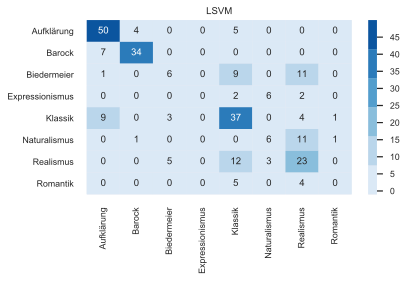

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(6, 4))
sns.set(font_scale=0.8)
sns.heatmap(conf_mat, 
            annot=True, 
            cmap=sns.color_palette("Blues"),
            vmin=-1,
            vmax=50,
            cbar_kws=dict(ticks=range(0,50,5)),
            fmt='g')
plt.title("LSVM")
plt.tight_layout()
#plt.savefig("../resources/confusion_matrices/lsvm_cm_ep_poet.png", dpi=300)
plt.show()